In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import warnings

In [7]:
df = pd.read_csv('guns.csv')
print(df)

        Unnamed: 0  year  month        intent  police sex   age  \
0                1  2012      1       Suicide       0   M  34.0   
1                2  2012      1       Suicide       0   F  21.0   
2                3  2012      1       Suicide       0   M  60.0   
3                4  2012      2       Suicide       0   M  64.0   
4                5  2012      2       Suicide       0   M  31.0   
5                6  2012      2       Suicide       0   M  17.0   
6                7  2012      2  Undetermined       0   M  48.0   
7                8  2012      3       Suicide       0   M  41.0   
8                9  2012      2    Accidental       0   M  50.0   
9               10  2012      2       Suicide       0   M   NaN   
10              11  2012      2       Suicide       0   M  30.0   
11              12  2012      1       Suicide       0   M  21.0   
12              13  2012      3       Suicide       0   M  43.0   
13              14  2012      3       Suicide       0   M  34.

Y [8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]


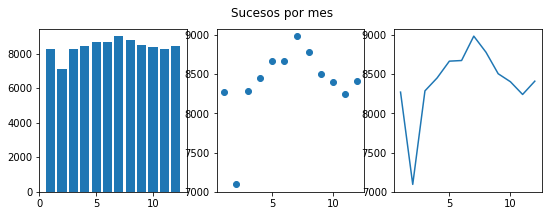

Mean:  6.5676005476299135
Median:  7.0
Mode:  7
Variance:  11.598056210127679
Std Deviation:  3.4055919030511683
Simetria: Simetrica
Variable Critica: Mes del suceso
Curtosis:  -1.1701561870205248 
La curtosis es negativa, por lo que la distribucion es platicurtica
Cola: No tiene cola


In [66]:
month_dict = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}

for month in df["month"]:
    month_dict[month] += 1

x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = []

for month in x:
    y.append(month_dict[month])
print("Y",y)
    
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(x, y)
plt.subplot(132)
plt.scatter(x, y)
plt.subplot(133)
plt.plot(x, y)
plt.suptitle('Sucesos por mes')
plt.show()

print("Mean: ", statistics.mean(df["month"]))
print("Median: ", statistics.median(df["month"]))
print("Mode: ", statistics.mode(df["month"]))
print("Variance: ", statistics.pvariance(df["month"]))
print("Std Deviation: ", statistics.pstdev(df["month"]))
print("Simetria: Simetrica")
print("Variable Critica: Mes del suceso")
print("Curtosis: ", stats.kurtosis(df["month"]), "\nLa curtosis es negativa, por lo que la distribucion es platicurtica")
print("Cola: No tiene cola")

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(177.87620260047493, 1972.6722631586476, 36.10370835714171)
[0.11171516 0.47726785 0.3626279  0.23924691 0.14891752 0.08977334
 0.05303261 0.03089262 0.01781188 0.01018965 0.00579323 0.00327723]


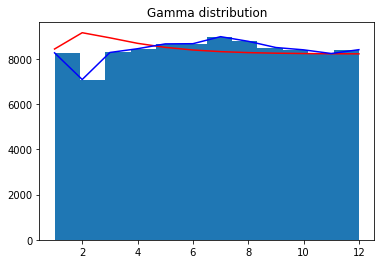

In [159]:
print(y)
param = stats.gamma.fit(y,1.5) # distribution fitting
print(param)

arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 6.8, 12)

pdf_fitted = stats.gamma.pdf(x_pdf,1.5)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x - param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Gamma distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(7093.0, 1306.833333333334)
[0.99004983 0.65824254 0.43763781 0.29096699 0.19345173 0.12861793
 0.08551265 0.05685377 0.03779968 0.02513142 0.01670883 0.011109  ]


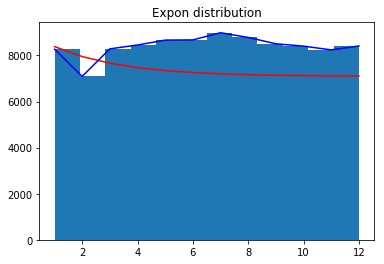

In [219]:
print(y)
param = stats.expon.fit(y) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 4.5, 12)

pdf_fitted = stats.expon.pdf(x_pdf)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x + param[0] for x in pdf_fitted]
plt.title('Expon distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(0.17759634154348802, 8242.999999999998, 1.5168972487531356)
[0.14406623 0.64611744 0.74583208 0.70630809 0.60165631 0.47617379
 0.35579818 0.2533802  0.17305359 0.11385461 0.07239753 0.0446092 ]


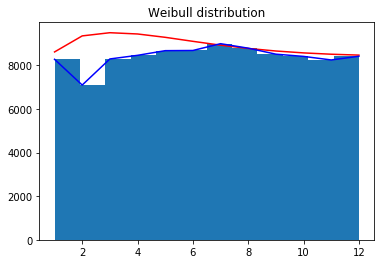

In [214]:
print(y)
param = stats.weibull_min.fit(y,1.51) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 2.5, 12)

pdf_fitted = stats.weibull_min.pdf(x_pdf,1.51)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x * param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Weibull distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(6.163792578835325, 7092.999999999998, 2.0230292092533517)


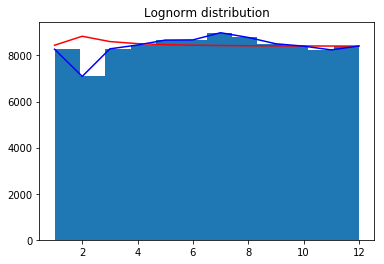

In [173]:
print(y)
param = stats.lognorm.fit(y,1.26) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 9, 12)

pdf_fitted = stats.lognorm.pdf(x_pdf,1.26)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x / param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Lognorm distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(5.978894688527274, -14.588526128370223, 7107.588526043869)
[2.62       0.69037526 0.26106794 0.12139056 0.06454034 0.03769781
 0.02360708 0.01559794 0.01075463 0.00767669 0.00563943 0.00424441]


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


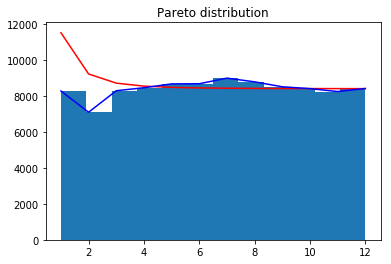

In [212]:
print(y)
param = stats.pareto.fit(y,2.62) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(1, 5.9, 12)

pdf_fitted = stats.pareto.pdf(x_pdf,2.62)
print(pdf_fitted)
pdf_fitted = [x * param[2] for x in pdf_fitted]
pdf_fitted = [x / param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Pareto distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(7093.0, 1896.0)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


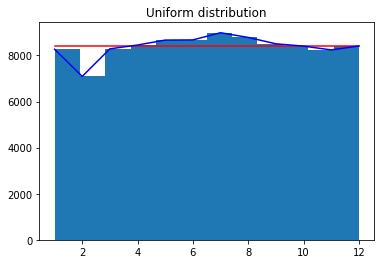

In [204]:
print(y)
param = stats.uniform.fit(y) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.1, .99, 12)

pdf_fitted = stats.uniform.pdf(x_pdf)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x / param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Uniform distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

[8273, 7093, 8289, 8455, 8669, 8677, 8989, 8783, 8508, 8406, 8243, 8413]
(8399.833333333334, 448.9749126869142)
[0.00443185 0.01961746 0.06448952 0.15744319 0.28546117 0.38437808
 0.38437808 0.28546117 0.15744319 0.06448952 0.01961746 0.00443185]


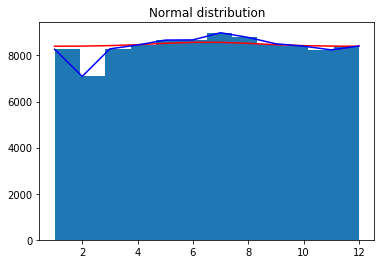

In [201]:
print(y)
param = stats.norm.fit(y) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(-3, 3, 12)

pdf_fitted = stats.norm.pdf(x_pdf)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x + param[0] for x in pdf_fitted]
plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.hist(df["month"],bins=12)
plt.show()

Y [21823, 42927, 21680, 12946, 1369]


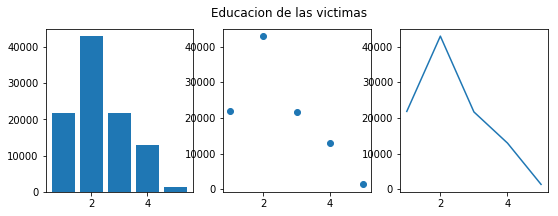

Mean:  6.5676005476299135
Median:  7.0
Mode:  7
Variance:  11.598056210127679
Std Deviation:  3.4055919030511683
Simetria: Simetrica
Variable Critica: Educacion de las vicitmas
Curtosis:  -1.1701561870205248 
La curtosis es negativa, por lo que la distribucion es platicurtica
Cola: No tiene cola


In [232]:
education_dict = dict()

for edu in df["education"]:
    try:
        var = int(edu)
        if var in education_dict:
            education_dict[edu] += 1
        else:
            education_dict[edu] = 1
    except:
        pass
    
x = [1,2,3,4,5]
y = []

for edu in x:
    y.append(education_dict[edu])
print("Y",y)
    
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(x, y)
plt.subplot(132)
plt.scatter(x, y)
plt.subplot(133)
plt.plot(x, y)
plt.suptitle('Educacion de las victimas')
plt.show()

print("Mean: ", statistics.mean(df["month"]))
print("Median: ", statistics.median(df["month"]))
print("Mode: ", statistics.mode(df["month"]))
print("Variance: ", statistics.pvariance(df["month"]))
print("Std Deviation: ", statistics.pstdev(df["month"]))
print("Simetria: Simetrica")
print("Variable Critica: Educacion de las vicitmas")
print("Curtosis: ", stats.kurtosis(df["month"]), "\nLa curtosis es negativa, por lo que la distribucion es platicurtica")
print("Cola: No tiene cola")

[21823, 42927, 21680, 12946, 1369]
(0.898890701937783, 1368.9999999999527, 16370.699418646182)
[0.11171516 0.2673484  0.06914184 0.01550097 0.00327723]


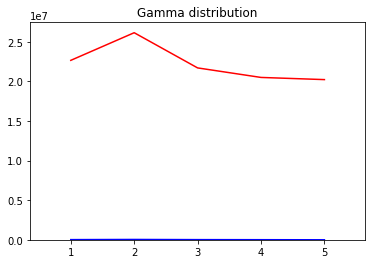

In [280]:
print(y)
param = stats.gamma.fit(y,1.5) # distribution fitting
print(param)

arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 6.8, 5)

pdf_fitted = stats.gamma.pdf(x_pdf,1.5)
print(pdf_fitted)
pdf_fitted = [x + param[0] for x in pdf_fitted]
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x * param[2] for x in pdf_fitted]
plt.title('Gamma distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()

[21823, 42927, 21680, 12946, 1369]
(1369.0, 18780.0)
[0.99004983 0.32222668 0.10487354 0.03413268 0.011109  ]


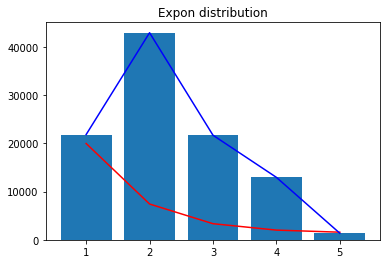

In [245]:
print(y)
param = stats.expon.fit(y) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 4.5, 5)

pdf_fitted = stats.expon.pdf(x_pdf)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x + param[0] for x in pdf_fitted]
plt.title('Expon distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()

[21823, 42927, 21680, 12946, 1369]
(0.12503831537027005, 1368.9999999999998, 4.054971088461785)
[0.14406623 0.72452712 0.41429196 0.15638046 0.0446092 ]


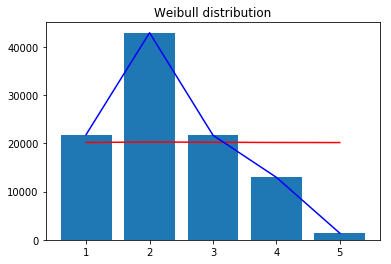

In [252]:
print(y)
param = stats.weibull_min.fit(y,1.51) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 2.5, 5)

pdf_fitted = stats.weibull_min.pdf(x_pdf,1.51)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x * param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Weibull distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()

[21823, 42927, 21680, 12946, 1369]
(7.016117686916152, 1368.9999999999998, 1.6427016632917664)


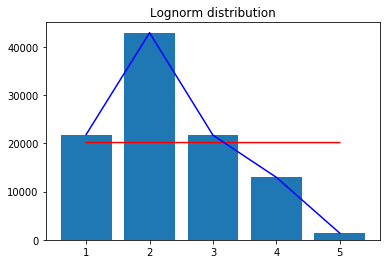

In [247]:
print(y)
param = stats.lognorm.fit(y,1.26) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.01, 9, 5)

pdf_fitted = stats.lognorm.pdf(x_pdf,1.26)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x / param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Lognorm distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()

[21823, 42927, 21680, 12946, 1369]
(0.4458622911798975, -3.053478819966031, 1372.053466878006)
[2.62       0.14486606 0.02960712 0.0098558  0.00424441]


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


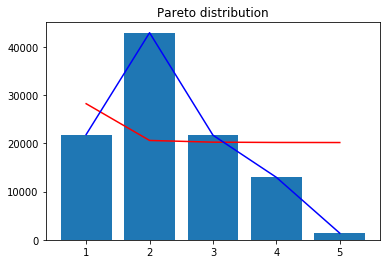

In [248]:
print(y)
param = stats.pareto.fit(y,2.62) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(1, 5.9, 5)

pdf_fitted = stats.pareto.pdf(x_pdf,2.62)
print(pdf_fitted)
pdf_fitted = [x * param[2] for x in pdf_fitted]
pdf_fitted = [x / param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Pareto distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()

[21823, 42927, 21680, 12946, 1369]
(1369.0, 41558.0)
[1. 1. 1. 1. 1.]


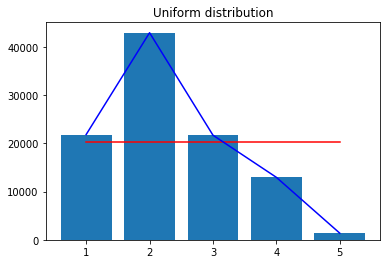

In [249]:
print(y)
param = stats.uniform.fit(y) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(.1, .99, 5)

pdf_fitted = stats.uniform.pdf(x_pdf)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x / param[0] for x in pdf_fitted]
pdf_fitted = [x + statistics.mean(y) for x in pdf_fitted]
plt.title('Uniform distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()

[21823, 42927, 21680, 12946, 1369]
(20149.0, 13627.583278043103)
[0.00443185 0.1295176  0.39894228 0.1295176  0.00443185]


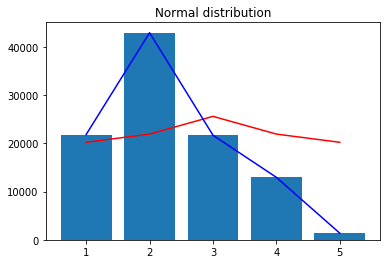

In [250]:
print(y)
param = stats.norm.fit(y) # distribution fitting
print(param)
arg = param[:-2]
loc = param[-2]
scale = param[-1]
# fitted distribution
# Build PDF and turn into pandas Series
x_pdf = np.linspace(-3, 3, 5)

pdf_fitted = stats.norm.pdf(x_pdf)
print(pdf_fitted)
pdf_fitted = [x * param[1] for x in pdf_fitted]
pdf_fitted = [x + param[0] for x in pdf_fitted]
plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',x,y,'b-')
plt.bar(x,y)
plt.show()